In [11]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from pathlib import Path
from functools import reduce

In [49]:
# Enter data path
data_path = "/Users/sana/Downloads/STAT390/Data/All Calls by Month"


In [51]:
data_path

'/Users/sana/Downloads/STAT390/Data/All Calls by Month'

In [53]:
folder = Path(data_path)
files = sorted(list(folder.glob("*.csv")) + list(folder.glob("*.xlsx")))

In [55]:
i=0; df = []
for f in files:
    if f.suffix.lower() == ".csv":
        df.append(pd.read_csv(f, header=0, dtype=str, engine="python", skip_blank_lines=False, nrows = 5))
    else:  # .xlsx
        df.append(pd.read_excel(f, sheet_name=0, header=0, dtype=str, nrows = 5))
    #df_main = pd.concat([df_main, df], ignore_index=True)
    print(i, f.stem, df[i].shape)
    i = i + 1

0 April 2024 (5, 63)
1 April 2025 (5, 63)
2 August 2024 (5, 57)
3 August 2025 (5, 63)
4 December 2024 (5, 55)
5 February 2025 (5, 63)
6 January 2025 (5, 64)
7 July 2024 (5, 55)
8 July 2025 (5, 63)
9 June 2024 (5, 63)
10 June 2025 (5, 63)
11 March 2025 (5, 64)
12 May 2024 (5, 63)
13 May 2025 (5, 63)
14 November 2024 (5, 63)
15 October 2024 (5, 55)
16 September 2024 (5, 55)


In [57]:
all_cols = reduce(lambda x, y: x | set(y.columns), df[1:], set(df[0].columns))
common_cols = reduce(lambda x, y: x & set(y.columns), df[1:], set(df[0].columns))
common_cols
not_in_all = all_cols - common_cols
print("Columns missing from at least one dataframe:", not_in_all)

Columns missing from at least one dataframe: {'Public Called IP Address', 'PSTN vendor name2', 'Call Recording Trigger', 'Call Recording Result', 'User', 'Redirecting party UUID', 'Public Calling IP Address', 'External caller ID number', 'Column1', 'Call Recording Platform Name', 'Device owner UUID'}


In [59]:
print(common_cols)

{'Device Mac', 'Site timezone', 'Local SessionID', 'User type', 'Network call ID', 'Final local sessionID', 'Duration', 'Report ID', 'PSTN legal entity', 'Remote call ID', 'Model', 'User UUID', 'Remote SessionID', 'Site UUID', 'Redirect reason', 'International Country', 'Redirecting number', 'Site main number', 'Final remote sessionID', 'Inbound trunk', 'User number', 'Answer Indicator', 'Client version', 'Authorization code', 'Call outcome reason', 'Called number', 'Answered', 'PSTN vendor Org ID', 'Original reason', 'Release time', 'Org UUID', 'Direction', 'Report time', 'Transfer related call ID', 'Related reason', 'Call type', 'Route group', 'Sub client type', 'Local call ID', 'Client type', 'Ring duration', 'Start time', 'Call transfer time', 'Related call ID', 'Call outcome', 'Answer time', 'Call ID', 'PSTN provider ID', 'OS type', 'Location', 'Correlation ID', 'Outbound trunk', 'Department ID', 'Releasing party', 'PSTN vendor name'}


In [61]:
df_main = pd.DataFrame(columns=list(common_cols))

In [63]:
i=0; 
for f in files:
    if f.suffix.lower() == ".csv":
        df = pd.read_csv(f, header=0, dtype=str, engine="python", skip_blank_lines=False)
    else:  # .xlsx
        df = pd.read_excel(f, sheet_name=0, header=0, dtype=str)
    df_main = pd.concat([df_main, df], ignore_index=True)
    print(i, f.stem, df.shape)
    i = i + 1

0 April 2024 (56662, 63)
1 April 2025 (63636, 63)
2 August 2024 (63262, 57)
3 August 2025 (57071, 63)
4 December 2024 (49445, 55)
5 February 2025 (63669, 63)
6 January 2025 (62623, 64)
7 July 2024 (62292, 55)
8 July 2025 (60438, 63)
9 June 2024 (56763, 63)
10 June 2025 (54598, 63)
11 March 2025 (59149, 64)
12 May 2024 (62944, 63)
13 May 2025 (55428, 63)
14 November 2024 (49953, 63)
15 October 2024 (62354, 55)
16 September 2024 (61250, 55)


In [65]:
df_main["Start time"] = pd.to_datetime(df_main["Start time"], utc=True)

In [75]:
unique_calls = df_main['Called number'].unique()

In [117]:
phone_line_total_calls = df_main['Called number'].value_counts().reset_index()
phone_line_total_calls.columns = ['Called number', 'total_calls']

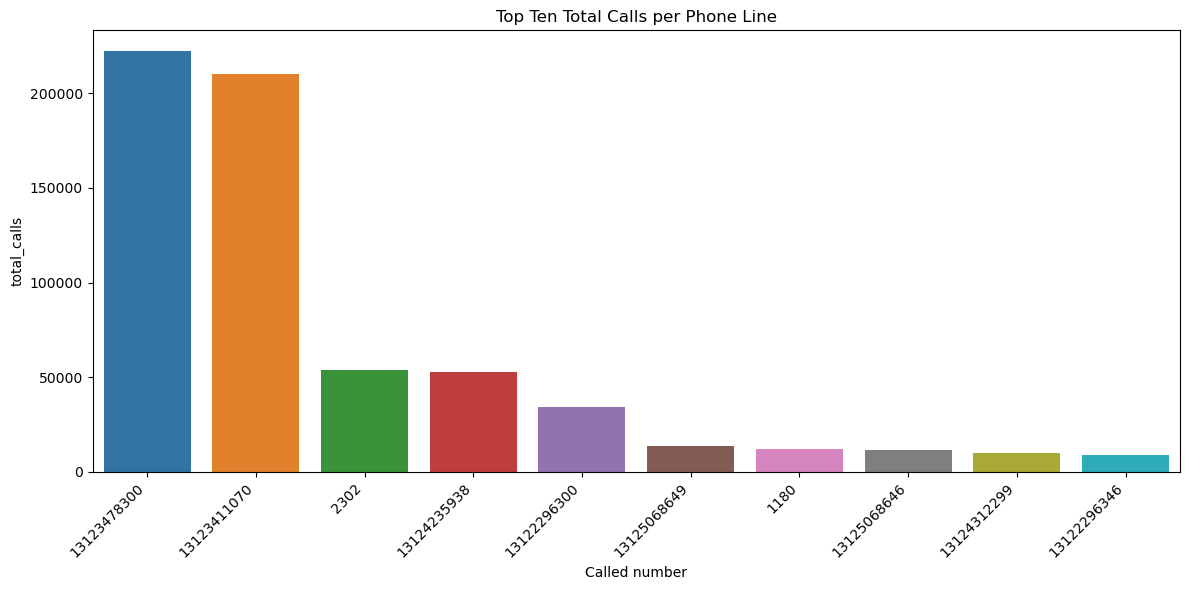

In [119]:
phone_line_total_calls_top_ten = phone_line_total_calls.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=phone_line_total_calls_top_ten, x='Called number', y='total_calls')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Total Calls per Phone Line')
plt.tight_layout()
plt.show()

In [105]:
termination_counts = df_main.groupby(['Called number', 'Call outcome reason']).size().reset_index(name='call_count')
termination_counts['pct'] = termination_counts.groupby('Called number')['call_count'].transform(lambda x: x / x.sum() * 100)


In [107]:
termination_counts

,Called number,Call outcome reason,call_count,pct
0,#,CallRejected,43,91.489362
1,#,UnassignedNumber,4,8.510638
2,#03221003089104#0,Normal,1,100.000000
3,#03221022116927#0,Normal,1,100.000000
4,#03221096229554#0,Normal,1,100.000000
...,...,...,...,...
24022,997735203698,CallRejected,1,100.000000
24023,998002727442,CallRejected,1,100.000000
24024,9999,CallRejected,1,100.000000
24025,99999,CallRejected,1,100.000000


KeyboardInterrupt: 

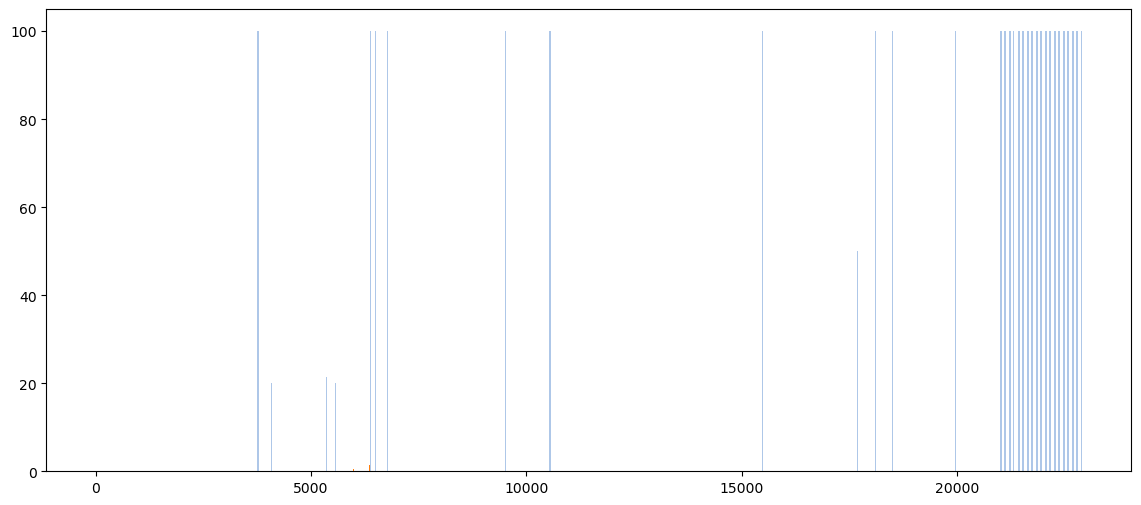

In [111]:
termination_chart = termination_counts.pivot(index='Called number', columns='Call outcome reason', values='pct').fillna(0)

termination_chart.plot(
    kind='bar',
    stacked=True,
    figsize=(14,6),
    colormap='tab20'
)
plt.title('Percentage of Termination Reasons per Phone Line')
plt.ylabel('Percentage of Calls')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Termination Reason', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()
